# connect to webcam

In [7]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [3]:
cap = cv2.VideoCapture(0)
cap.set(3,640) # adjust width
cap.set(4,480) # adjust height

True

In [4]:
ret, frame = cap.read()

In [5]:
print(ret)

True


# create live feed

In [6]:
cap = cv2.VideoCapture(0) 
cap.set(3,640) 
cap.set(4,480) 

while True: 
    success, img = cap.read()
    cv2.imshow("Webcam", img) 
    if cv2.waitKey(1) & 0xFF==ord('q'): 
        cap.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1) 

-1

# Capture from webcam

In [ ]:
def take_photo():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cv2.imwrite("JL06.jpg", frame)
    cap.release()

In [ ]:
# take photo command
take_photo()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show

# convert live feed to binary image

In [7]:
cap = cv2.VideoCapture(0) 
while True:
    ret, frame = cap.read()
    width = int(cap.get(3))
    height = int(cap.get(4))
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)# can change to cv2.COLOR_BGR2HLS or cv2.COLOR_BGRGRAY
    lower_blue = np.array([160,20,70])
    upper_blue = np.array([190,255,255])
    
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    result = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', result)
    cv2.imshow('mask', mask)

    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        cap.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the wi

-1

# Save frames from live feed to jpg

In [9]:
def save_frame_camera_key(device_num, dir_path, basename, ext='jpg', delay=1, window_name='frame'):
    cap = cv2.VideoCapture(device_num)

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    n = 0
    
    # to do the same with mask segmenenting: + 
    #while True:
    #ret, frame = cap.read()
    #width = int(cap.get(3))
    #height = int(cap.get(4))
    
    #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    #lower_blue = np.array([160,20,70])
    #upper_blue = np.array([190,255,255])
    
    #mask = cv2.inRange(hsv, lower_blue, upper_blue)
    
    #result = cv2.bitwise_and(frame, frame, mask=mask)
    
    while True:
        ret, frame = cap.read()
        cv2.imshow(window_name, frame)
        #cv2.imshow(window_name, mask)
        key = cv2.waitKey(delay) & 0xFF
        if key == ord('c'):
            cv2.imwrite('{}_{}.{}'.format(base_path, n, ext), frame)
            n += 1
        elif key == ord('q'):
            break

    cv2.destroyWindow(window_name)


save_frame_camera_key(0, 'data/teml', 'camera_capture')

In [ ]:
lower_blue = np.array([101,50,38])
upper_blue = np.array([110,255,255])

lower_purp = np.array([0, 22, 55])
upper_purp = np.array([328, 22, 23])

# Convert saved image to binary (HSV)

In [1]:
import cv2
import numpy as np

# Read image
img = cv2.imread("IMG_9692.jpg")

# Convert to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define range of brown color in HSV
#lower_brown = np.array([20, 100, 100])
#upper_brown = np.array([30, 255, 255])
# Define the range of colors for the mask
lower_colour = np.array([101,50,38])
upper_colour = np.array([110,255,255])


# Threshold the HSV image to get only brown colors
mask = cv2.inRange(hsv, lower_colour, upper_colour)
cv2.imshow("mask", mask)
cv2.imshow('mask', mask)

# Wait for the user to press a key
cv2.waitKey(0)

# Save the image to disk
cv2.imwrite('mask_1.jpg', mask)

# Count the number of brown pixels in the image
brown_pixels = cv2.countNonZero(mask)
total_pixels = np.prod(img.shape[:2])

if cv2.waitKey(1) & 0xFF==ord('q'):
        cap.release()

# Print the result
print("Number of brown pixels: ", brown_pixels)
print("total pixels: ", brown_pixels)
print("The total number of pixels in the image is:", total_pixels)

Number of brown pixels:  1
total pixels:  1
The total number of pixels in the image is: 17915904


# Convert image to binary (Grayscale)

In [ ]:
import cv2

image = cv2.imread('Biohybrid2.jpg')

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, frame = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2.imshow('Binary image', frame)
cv2.imwrite('Biohybridout4.jpg', frame)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Count numbed of black and white pixels to determine area covered by bacteria

In [7]:
import cv2

# Load binary image
binaryImage = cv2.imread('Newday3.jpg', cv2.IMREAD_GRAYSCALE)

# Get histogram
histogram = cv2.calcHist([binaryImage], [0], None, [2], [0, 256])

# Print number of black and white pixels
print("Black pixels:", int(histogram[0][0]))
print("White pixels:", int(histogram[1][0]))
print("total pixels:", int(histogram[1][0]+histogram[0][0]))

Black pixels: 3550777
White pixels: 14365127
total pixels: 17915904


# Create histogram of image greyscale data (single file)

In [ ]:
import cv2
import matplotlib.pyplot as plt

# read in the image
img = cv2.imread('Out1-01.jpg')

# create the histogram
hist = cv2.calcHist([img], [0], None, [256], [0,256])

# plot the histogram using matplotlib
plt.hist(img.ravel(), bins=20, range=[0,256])
plt.show()

In [ ]:
totalPixels = size(binaryImage,1)*size(binaryImage,2);
blackPixels = totalPixels - histogram(2);
fprintf('Black pixels: %d\nWhite pixels: %d\n', blackPixels, histogram(2));

# Create histogram of image greyscale data (multiple files)

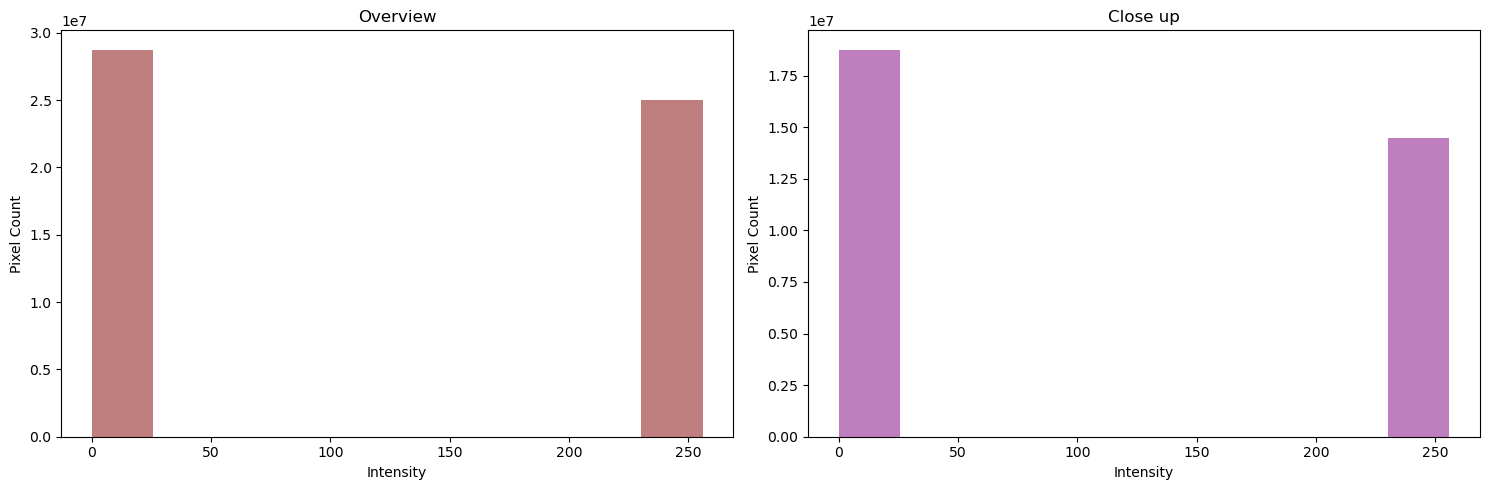

In [3]:
import cv2
import matplotlib.pyplot as plt

# read in the images
img1 = cv2.imread('Biohybridout2.jpg')
img2 = cv2.imread('Biohybridout1.jpg')
#img3 = cv2.imread('NewDay3.JPG')

# create the histograms
hist1 = cv2.calcHist([img1], [0], None, [256], [0,256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0,256])
#hist3 = cv2.calcHist([img3], [0], None, [256], [0,256])

# create subplots
fig, axs = plt.subplots(1, 2, figsize=(15,5), tight_layout=True)
axs[0].hist(img1.ravel(), bins=10, range=[0,256], color='maroon', alpha=0.5, label='image1')
axs[1].hist(img2.ravel(), bins=10, range=[0,256], color='purple', alpha=0.5, label='image2')
#axs[2].hist(img3.ravel(), bins=10, range=[0,256], color='blue', alpha=0.5, label='image3')

# set labels for subplots
axs[0].set_title('Overview')
axs[1].set_title('Close up')
#axs[2].set_title('Day 3')

axs[0].set(xlabel="Intensity", ylabel="Pixel Count")
axs[1].set(xlabel="Intensity", ylabel="Pixel Count")
#axs[1].set(xlabel="Intensity", ylabel="Pixel Count")

plt.show()

# HSL Colour mask

In [10]:
import cv2
import numpy as np

# Read image
img = cv2.imread("IMG_9692.jpg")

hls = cv2.cvtColor(img, cv2.COLOR_BGR2HSL)

#lower_brown = np.array([20, 100, 100])
#upper_brown = np.array([30, 255, 255])
lower_colour = np.array([338, 8, 47])
upper_colour = np.array([284, 10, 22])

mask = cv2.inRange(hsl, lower_colour, upper_colour)
cv2.imshow("mask", mask)
cv2.imshow('mask', mask)

cv2.waitKey(0)

cv2.imwrite('mask_1.jpg', mask)

brown_pixels = cv2.countNonZero(mask)
total_pixels = np.prod(image.shape[:2])

if cv2.waitKey(1) & 0xFF==ord('q'):
        cap.release()

# Print the result
print("Number of brown pixels: ", brown_pixels)
print("total pixels: ", brown_pixels)
print("The total number of pixels in the image is:", total_pixels)

AttributeError: module 'cv2' has no attribute 'COLOR_BGR2HSL'

# Measure number of black pixels inside a circle mask - Can be used for counting pixels on a petri dish (?)

In [ ]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('Plateimg-01.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image

# Get the height and width of the image
height, width = gray.shape[:2]

# Define the center of the image
center = (int(width/2), int(height/2))

# Define the radius of the circle
radius = int(min(height, width)/2.2)

# Create a black mask with the same size as the image
mask = np.zeros((height, width), dtype=np.uint8)

# Draw a white circle on the mask
cv2.circle(mask, center, radius, (255, 255, 255), -1)

# Apply the mask to the image
result = cv2.bitwise_and(gray, gray, mask=mask)

# Count the number of black pixels in the result
black_pixels = cv2.countNonZero(result)
print("Number of black pixels inside the circle:", black_pixels)

# Show the result
cv2.imshow('Result', result)

# Wait for the user to press a key
cv2.waitKey(0)

# Close the window
cv2.destroyAllWindows()

Number of black pixels inside the circle: 3262077


# Read 3 images in one graph MatLab

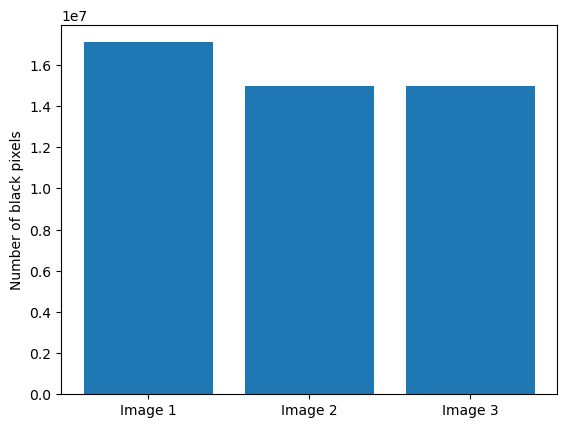

In [15]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd


image1 = cv2.imread('Newday1.JPG', 0)
image2 = cv2.imread('Newday2.JPG', 0)
image3 = cv2.imread('Newday2.JPG', 0)

# Count the number of black pixels in each image
black_pixels1 = cv2.countNonZero(image1)
black_pixels2 = cv2.countNonZero(image2)
black_pixels3 = cv2.countNonZero(image3)

# Create a list of the black pixel counts
black_pixels = [black_pixels1, black_pixels2, black_pixels3]

# Create a list of the image labels
image_labels = ['Image 1', 'Image 2', 'Image 3']

# Plot the histogram
plt.bar(image_labels, black_pixels)
plt.ylabel('Number of black pixels')
plt.show()


# stitch images in one column

In [2]:
import cv2
import numpy as np
img1 = cv2.imread("L.jpg")
img2 = cv2.imread("U2.jpg")
img3 = cv2.imread("U3.jpg")

#axis 1 = horizontal, axis 0 = vertical

#vis = np.concatenate((img1, img2), axis=1)
vis = np.concatenate((img1, img2, img3), axis=0)
cv2.imwrite('out2.png', vis)

[ WARN:0@0.025] global loadsave.cpp:244 findDecoder imread_('L.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.025] global loadsave.cpp:244 findDecoder imread_('U2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.025] global loadsave.cpp:244 findDecoder imread_('U3.jpg'): can't open/read file: check file path/integrity


ValueError: zero-dimensional arrays cannot be concatenated

# Stitch images in two columns and save as new image

In [1]:
from PIL import Image

def stitch_images(columns, space, images):
    rows = len(images) // columns
    if len(images) % columns:
        rows += 1
    width_max = max([Image.open(image).width for image in images])
    height_max = max([Image.open(image).height for image in images])
    background_width = width_max*columns + (space*columns)-space
    background_height = height_max*rows + (space*rows)-space
    background = Image.new('RGBA', (background_width, background_height), (255, 255, 255, 255))
    x = 0
    y = 0
    for i, image in enumerate(images):
        img = Image.open(image)
        x_offset = int((width_max-img.width)/2)
        #x_offset =int(img.width)
        #y_offset =int(img.height)
        y_offset = int((height_max-img.height)/2)
        #x_offset = int(width_max/6)
        #y_offset = int(height_max+50)
        background.paste(img, (x+x_offset, y+y_offset))
        x += width_max + space
        if (i+1) % columns == 0:
            y += height_max + space
            x = 0
    background.save('newimage.png')
    pil_im = Image.open('newimage.png', 'r')
     

stitch_images(columns=2, space=2, images=['1L.jpg', '2L.jpg', '3L.jpg', '4L.jpg', '5L.jpg', '6L.jpg', '7L.jpg', '8L.jpg'])
    

FileNotFoundError: [Errno 2] No such file or directory: '1L.jpg'

In [3]:
from PIL import Image

# Open all 8 images
images = [Image.open(f'image{i}.jpg') for i in range(1, 9)]

# Create a new blank image with a width of the sum of the widths of the first two images and a height of the double of the height of the first image
stitched_image = Image.new('RGB', (images[0].width + images[1].width, 2 * images[0].height))

# Paste the first two images into the new image
stitched_image.paste(images[0], (0, 0))
stitched_image.paste(images[1], (images[0].width, 0))

# Paste the next two images into the new image
stitched_image.paste(images[2], (0, images[0].height))
stitched_image.paste(images[3], (images[0].width, images[0].height))

# paste the next two images into the new image
stitched_image.paste(images[4], (0, 2*images[0].height))
stitched_image.paste(images[5], (images[0].width, 2*images[0].height))

# paste the next two images into the new image
stitched_image.paste(images[6], (0, 3*images[0].height))
stitched_image.paste(images[7], (images[0].width, 3*images[0].height))

# Save the final stitched image
stitched_image.save('stitched_image.jpg')

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/histogram.cpp:202: error: (-215:Assertion failed) ranges[i] && ranges[i][0] < ranges[i][1] in function 'histPrepareImages'


# Crop image

In [ ]:
import cv2
import cv2 as cv

import cv2

im = cv2.imread('7LC.jpg')

print(type(im))
print(im.shape)
print(type(im.shape))

image = cv2.imread(r"7LC.jpg")

y=0
x=0
h=1080
w=757
crop_image = image[x:w, y:h]
cv2.imshow("7LC.jpg", crop_image)
cv2.imwrite("7LC.jpg", crop_image)
cv2.waitKey(0)